# Template

In [2]:
import pandas as pd
import numpy as np
import missingno as mano
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 25)
np.set_printoptions(threshold=25)
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, log_loss, roc_auc_score,mean_absolute_error,mean_squared_error, r2_score


def load_data(data,type):
    if type=="csv":
        mydf = pd.read_csv(data,low_memory=False)
    elif type=="excel":
        mydf = pd.read_excel(data,low_memory=False)
    return mydf

def details(mydf,n):
    display(mydf.shape)
    display(mydf.dtypes)
    display(mydf.head(n))
    display(mydf.tail(n))
    return None

def del_col(mydf,name):
    mydf = mydf.drop(labels=[name],axis=1)
    return mydf

def del_row_val(mydf,value,col):
    mydf = mydf.drop(mydf.loc[mydf[col]==value].index, inplace=True)
    return mydf

def missing_val(mydf):
    mydf.replace(" ", np.nan, inplace = True) 
    pd.set_option('display.max_rows', None)
    display (mydf.isnull().sum()>0)
    return None

def mano_mva(mydf):
    mano.matrix(mydf,figsize=(20, 40))
    mano.heatmap(mydf,figsize=(10, 10))
    return None

def cater_mva(mydf,column,method):
    if (method=='average'):
        a=mydf[column].mean()
        mydf[column].fillna(value=a[0],inplace=True)
    elif (method=='mode'):
        a=mydf[column].mode()
        mydf[column].fillna(value=a[0],inplace=True)
    elif (method=='median'):
        a=mydf[column].median()
        mydf[column].fillna(value=a[0],inplace=True)
    
    return mydf

def num_analysis(mydf,col,col2):
    display(mydf[col].hist())
    plt.show()
    display(sns.boxplot(x=mydf[col],showmeans=True))
    plt.show()
    display(fig = sm.qqplot(mydf[col], line='45'))
    plt.show()

    display(mydf[col].describe())
    
    first = mydf[[col]]  
    second = mydf[[col2]] 
    
    t1, p1 = stats.ttest_ind(first,second)
    print("\n"+"t-test of "+col+" and "+col2+" is:")
    print("t value = " + str(t1))
    print("p value = " + str(p1))
    
    return None

def cat_analysis(mydf,col):
    display(mydf[col].value_counts())
    display(sns.countplot(x=col, data=mydf))
    return None

def chg_type(mydf,col,dtype):
    mydf = mydf.astype({col: dtype})
    return mydf

def discretize(mydf,col,lb,n):
    mydf['discretized']=pd.cut(mydf[col],n,labels=lb)
    return mydf

def date_info(xdf,col):
    xdf[col] = pd.to_datetime(xdf[col])
    xdf['year'], xdf['month'],xdf['day'] = xdf[col].dt.year, xdf[col].dt.month, xdf[col].dt.day
    return xdf

def deep_copy(mydf):
    a=mydf.copy(deep=True)
    return a

def e_code (mydf,enc):
    if enc=='ordinal':
        coder = OrdinalEncoder()
        coder.fit(mydf)
        encoded = coder.transform(mydf)
        return encoded
    elif enc=='label':
        coder = LabelEncoder()
        coder.fit(mydf)
        encoded = coder.transform(mydf)
        return encoded
    elif enc== 'onehot':
        mydf=pd.get_dummies(mydf)
        return mydf

def m_l(mydf,algo,task,pcol):
    if(algo=='knn'):
        pred=mydf[pcol]
        pdf=deep_copy(mydf)
        del pdf[pcol]
        pdf
        pdf=pd.get_dummies(pdf)
        y=pred
        x=pdf
        
        X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)
        scaler=StandardScaler()
        scaler.fit(X_train)
        
        X_train=scaler.transform(X_train)
        X_test=scaler.transform(X_test)
        
        if(task=='classification'):
            classifier=KNeighborsClassifier(n_neighbors=5)
            classifier.fit(X_train,y_train)
            y_pred=classifier.predict(X_test)
            print(confusion_matrix(y_test,y_pred))
            print(classification_report(y_test,y_pred))
            print('Log Loss is '+str(log_loss(y_test,y_pred)))
            print('AUC is '+str(roc_auc_score(y_test,y_pred)))
            
        elif(task=='regression'):
            regressor=KNeighborsRegressor(n_neighbors=5)
            regressor.fit(X_train,y_train)
            y_pred=regressor.predict(X_test)
            print('MAE is '+str(mean_absolute_error(y_test,y_pred)))
            print('MSE is '+str(mean_squared_error(y_test,y_pred)))
            print('R Square is '+str(r2_score(y_test,y_pred)))
            print('Adjusted R Square is '+str(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))))
    return None

def anova(mydf,col1,col2):
    display(stats.f_oneway(mydf[col1],mydf[col2]))
    return None

def cor_hmap(mydf):
    corrmatrix = mydf.corr()
    f, axis = plt.subplots(figsize =(15, 10)) 
    sns.heatmap(corrmatrix, ax = axis, linewidths = 0.2)
    return None

def scat_plt(mydf,col1,col2):
    plt.scatter(mydf[col1], mydf[col2], c='green')
    plt.show()
    return None

# Bankruptcy Analysis

In [12]:
bdf=load_data('bankruptcy.csv','csv')

In [13]:
pd.set_option('display.max_rows', 1000)

In [14]:
details(bdf,5)

(6819, 96)

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                             float64
 Interest-bearing debt interest rate            

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


In [15]:
pd.set_option('display.max_rows', 25)

In [16]:
missing_val(bdf)

Bankrupt?                                                   False
 ROA(C) before interest and depreciation before interest    False
 ROA(A) before interest and % after tax                     False
 ROA(B) before interest and depreciation after tax          False
 Operating Gross Margin                                     False
 Realized Sales Gross Margin                                False
 Operating Profit Rate                                      False
 Pre-tax net Interest Rate                                  False
 After-tax net Interest Rate                                False
 Non-industry income and expenditure/revenue                False
 Continuous interest rate (after tax)                       False
 Operating Expense Rate                                     False
 Research and development expense rate                      False
 Cash flow rate                                             False
 Interest-bearing debt interest rate                        False
 Tax rate 

In [17]:
m_l(bdf,'knn','classification','Bankrupt?')

[[1314    3]
 [  40    7]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1317
           1       0.70      0.15      0.25        47

    accuracy                           0.97      1364
   macro avg       0.84      0.57      0.61      1364
weighted avg       0.96      0.97      0.96      1364

Log Loss is 1.088834152326577
AUC is 0.573329132942374


# Churn

In [83]:
cdf=load_data('telco churn.csv','csv')

In [84]:
pd.set_option('display.max_rows', 1000)

In [85]:
details(cdf,5)

(5986, 22)

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
5985,860,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.3,No


In [86]:
pd.set_option('display.max_rows', 25)

In [87]:
missing_val(cdf)

Unnamed: 0          False
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

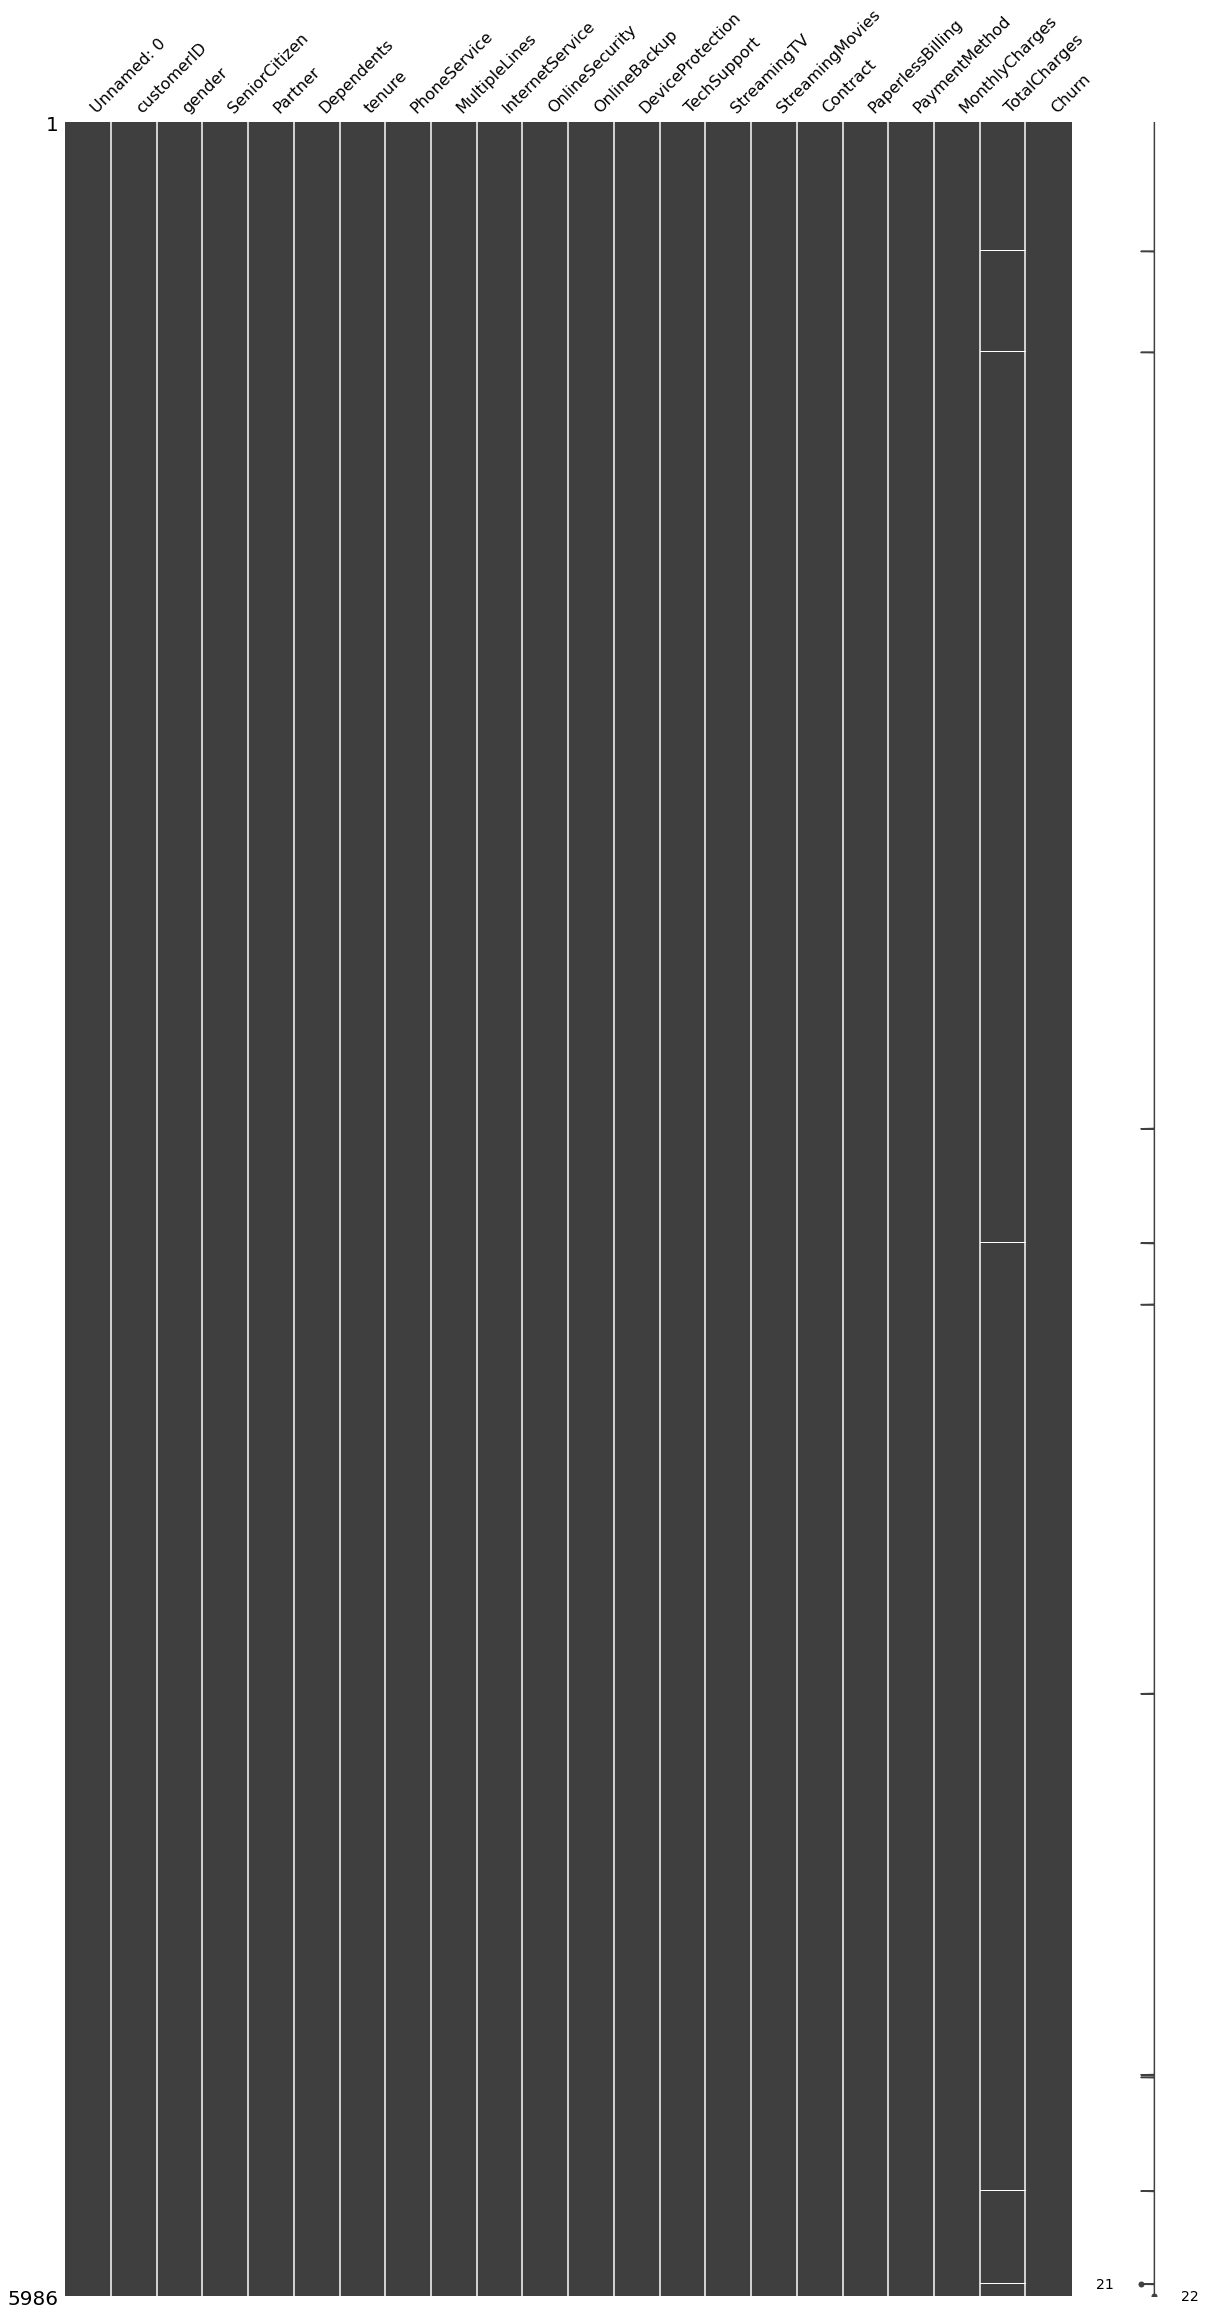

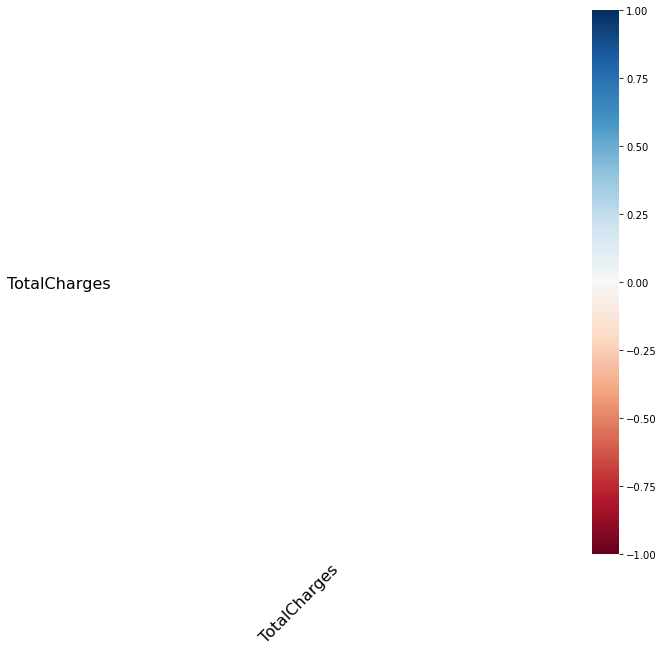

In [88]:
mano_mva(cdf)

In [89]:
len(cdf)

5986

In [90]:
(sum([True for idx,row in cdf.iterrows() if any(row.isnull())])/5986)*100

0.1670564650851988

In [91]:
cdf = cdf.dropna( how='any',subset=['TotalCharges'])

In [92]:
len(cdf)

5976

In [93]:
m_l(cdf,'knn','classification','Churn')

[[ 12 861]
 [  4 319]]
              precision    recall  f1-score   support

          No       0.75      0.01      0.03       873
         Yes       0.27      0.99      0.42       323

    accuracy                           0.28      1196
   macro avg       0.51      0.50      0.23      1196
weighted avg       0.62      0.28      0.13      1196



ValueError: could not convert string to float: 'Yes'

# Stroke

In [72]:
sdf=load_data('stroke.csv','csv')

In [73]:
pd.set_option('display.max_rows', 1000)

In [74]:
details(sdf,5)

(5110, 12)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [75]:
pd.set_option('display.max_rows', 25)

In [76]:
missing_val(sdf)

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

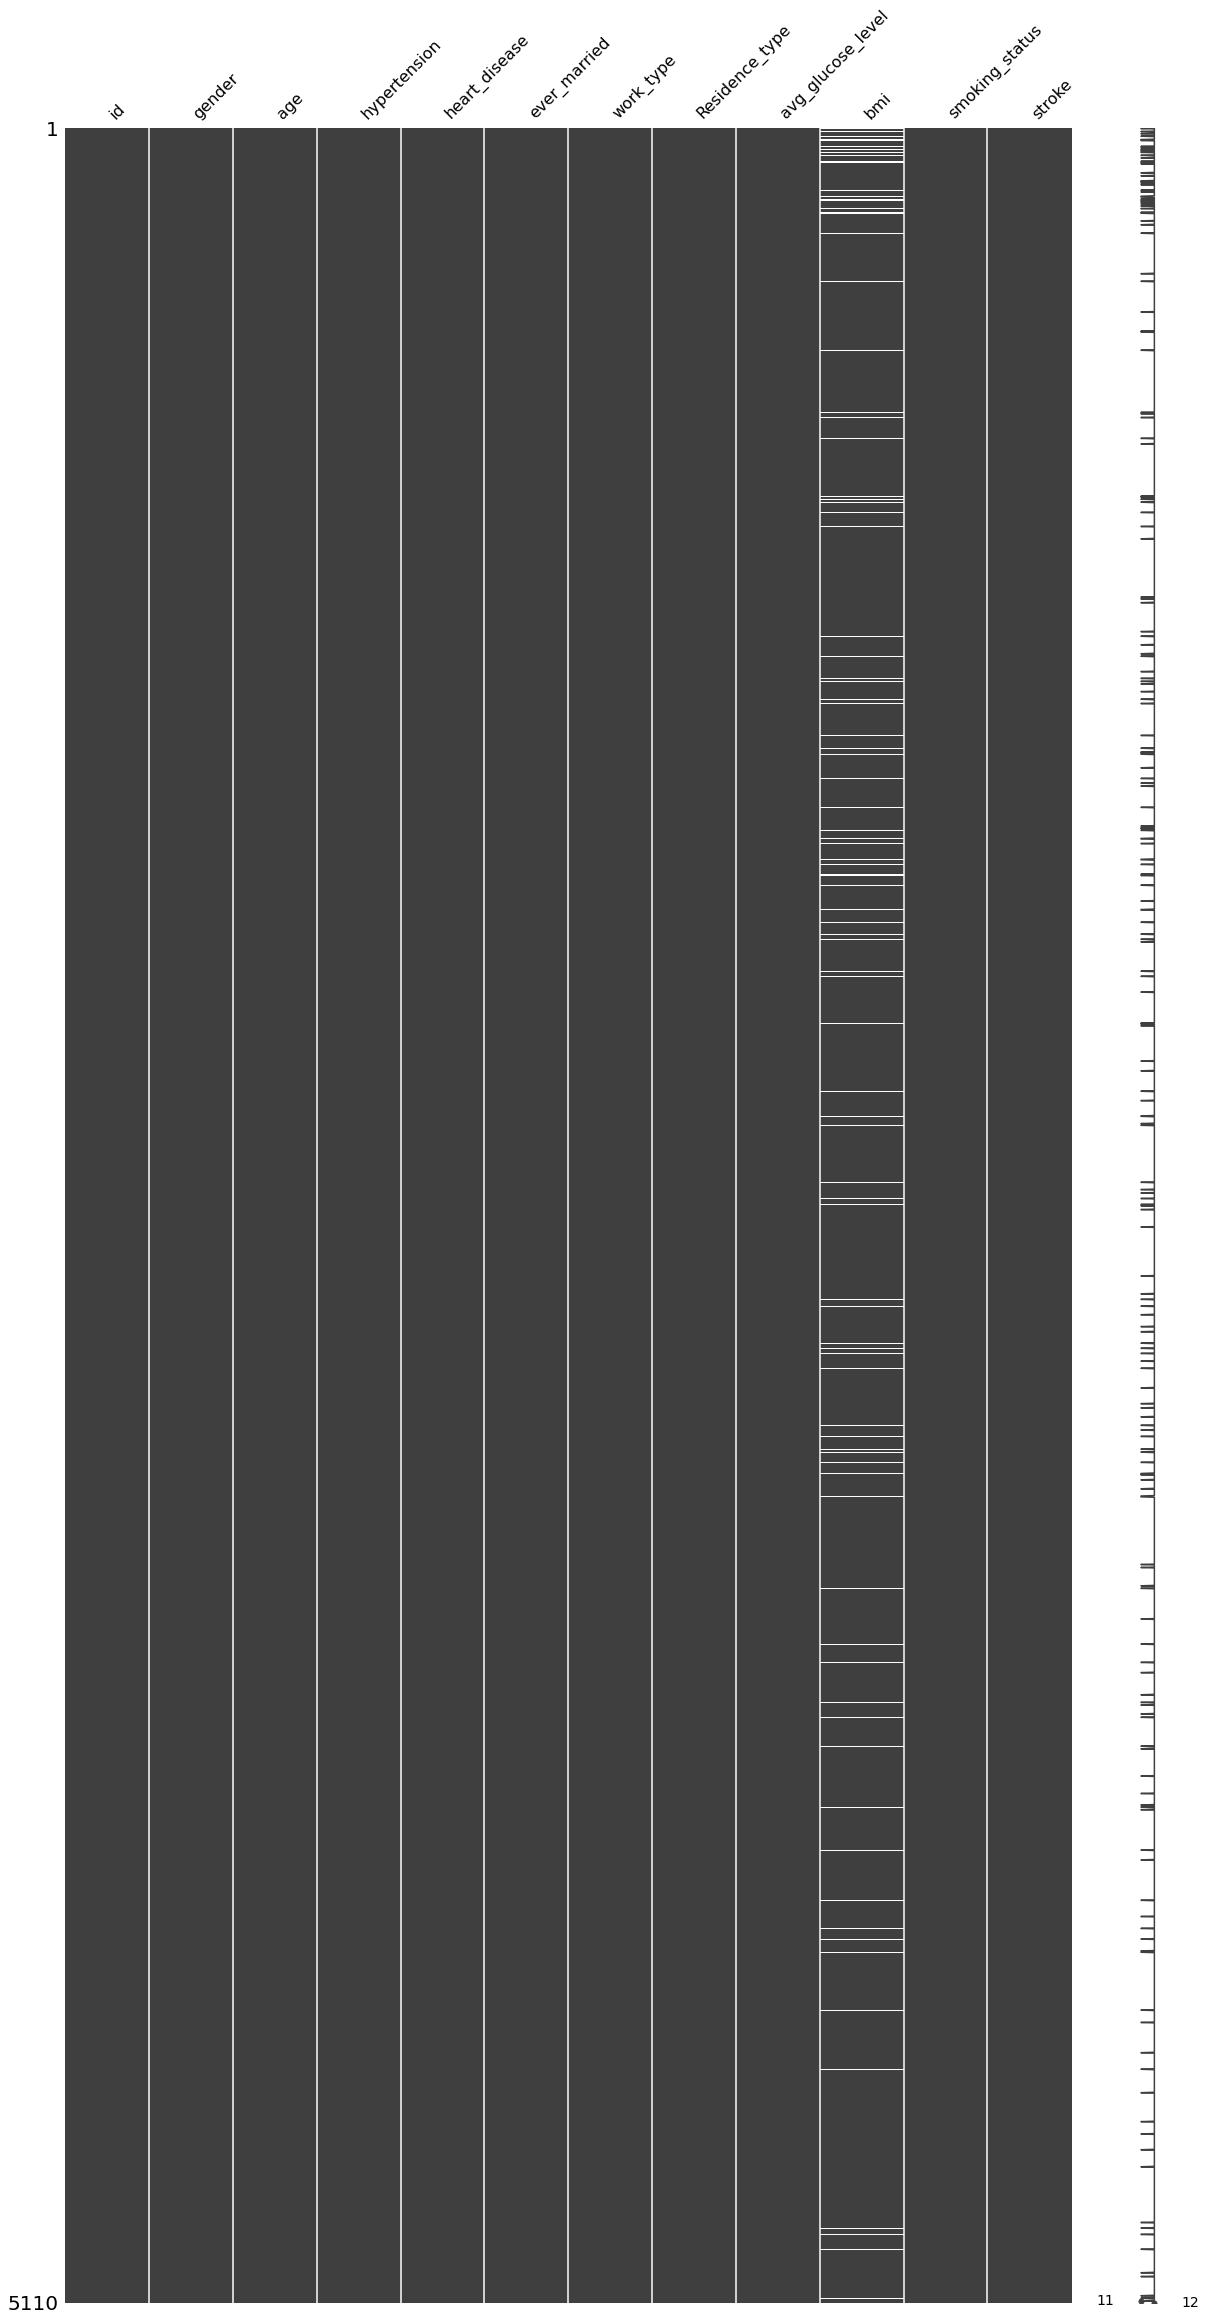

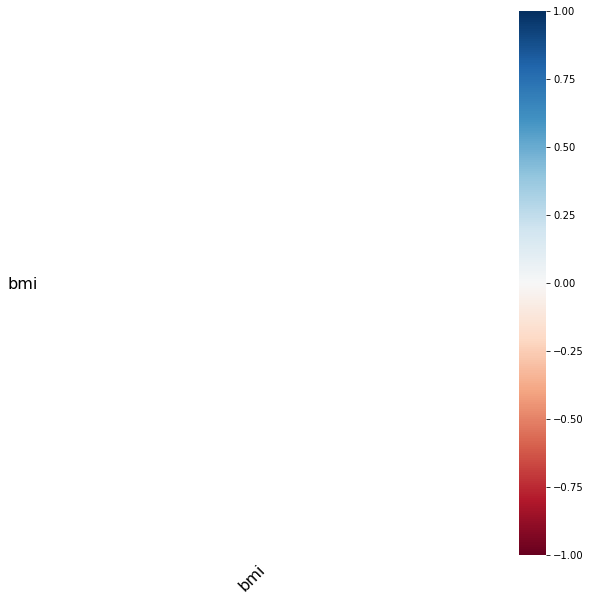

In [77]:
mano_mva(sdf)

In [78]:
nsdf=deep_copy(sdf)

In [79]:
nsdf=del_col(nsdf,'bmi')

In [80]:
m_l(nsdf,'knn','classification','stroke')

[[972   4]
 [ 44   2]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       976
           1       0.33      0.04      0.08        46

    accuracy                           0.95      1022
   macro avg       0.65      0.52      0.53      1022
weighted avg       0.93      0.95      0.94      1022

Log Loss is 1.622176580572832
AUC is 0.5196899501069138


In [81]:
sdf=sdf.dropna( how='any',subset=['bmi'])

In [82]:
m_l(sdf,'knn','classification','stroke')

[[940   3]
 [ 39   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       943
           1       0.00      0.00      0.00        39

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982

Log Loss is 1.4772209851105296
AUC is 0.4984093319194062
